In [46]:
## thêm thư viện opencv, numpy
import cv2
import numpy
import matplotlib.pyplot as plt

In [146]:
## đọc ảnh màu, ảnh xám
C = cv2.imread('lena.png', 1)
G = cv2.imread('lena_gray.png', 0)

161


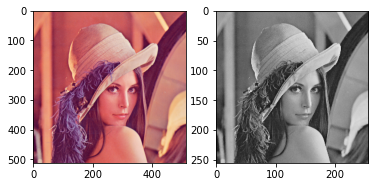

In [147]:
## hiển thị ảnh
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(cv2.cvtColor(C, cv2.COLOR_BGR2RGB)) ## vì opencv đọc ảnh lưu theo BGR, pyplot xuất ảnh theo RGB nên phải đổi BGR->RGB
ax2.imshow(G, cmap='gray')

In [117]:
## hàm tính histogram của ảnh I kênh màu 'b'
def histogram_calculate(I, b, bitAllocated):
    h = (2**bitAllocated)*[0]
    for r in range(len(I)):
        for c in range(len(I[r])):
            if type(I[r][c]) != numpy.uint8:
                h[I[r][c][b]] = h[I[r][c][b]]+1
            else :
                h[I[r][c]] = h[I[r][c]]+1
    return h

In [144]:
## tính histogram của ảnh xám G
hG = histogram_calculate(G, 0, 8)

## vì opencv đọc, lưu ảnh theo thứ tự BGR
hr = histogram_calculate(C, 2, 8)
hgr = histogram_calculate(C, 1, 8)
hb = histogram_calculate(C, 0, 8)

256


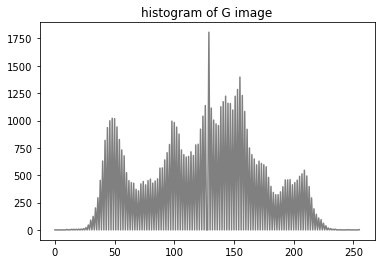

In [171]:
## plot histogram
print(len(G))
xticks = list(range(0, 256, 1))
plt.plot(xticks, hG, color='gray')
plt.title("histogram of G image")
plt.show()

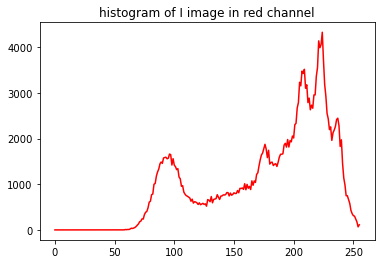

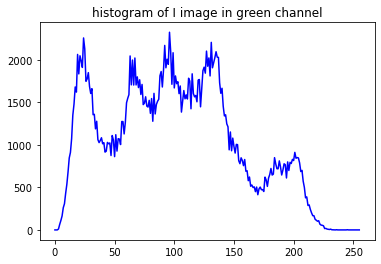

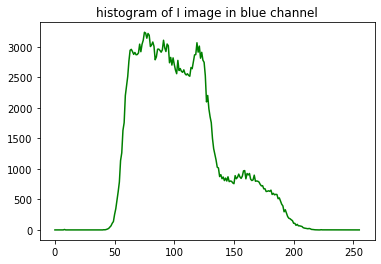

In [169]:
## plot histogram
plt.plot(xticks, hr, "r-")
plt.title("histogram of I image in red channel")
plt.show()
plt.plot(xticks, hgr, "b-")
plt.title("histogram of I image in green channel")
plt.show()
plt.plot(xticks, hb, "g-")
plt.title("histogram of I image in blue channel")
plt.show()

In [182]:
## tính luminance image L
L = numpy.zeros(shape=(len(C), len(C[0])))
for r in range(len(L)):
    for c in range(len(C)):
        L[r][c] = 0.299*C[r][c][2] + 0.587*C[r][c][1] + 0.114*C[r][c][0] 

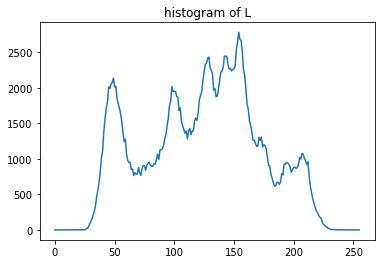

In [188]:
##
# print(L.astype(int))
hL = histogram_calculate(L.astype(numpy.uint8), 0, 8)
plt.plot(xticks, hL, "-")
plt.title("histogram of L")
plt.show()

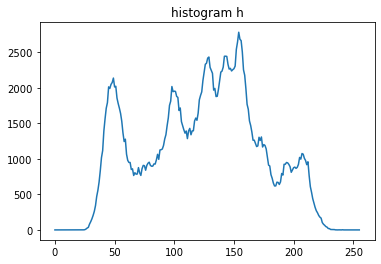

In [191]:
h = (2**8)*[0]
for i in range(2**8):
    h[i] = 0.299*hr[i] + 0.587*hgr[i] + 0.114*hb[i]
hL = histogram_calculate(L.astype(numpy.uint8), 0, 8)
plt.plot(xticks, hL, "-")
plt.title("histogram h")
plt.show()